In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_shape = [64,64]

In [5]:
train_path = (r'C:\Users\HP\Downloads\CNN_dataset\Section 40 - Convolutional Neural Networks (CNN)\dataset\training_set')
test_path = (r'C:\Users\HP\Downloads\CNN_dataset\Section 40 - Convolutional Neural Networks (CNN)\dataset\test_set')

In [6]:
vgg = VGG16(input_shape = image_shape + [3], weights = 'imagenet', include_top = False)

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
from glob import glob
folders = glob(r'C:\Users\HP\Downloads\CNN_dataset\Section 40 - Convolutional Neural Networks (CNN)\dataset\training_set')
folders

['C:\\Users\\HP\\Downloads\\CNN_dataset\\Section 40 - Convolutional Neural Networks (CNN)\\dataset\\training_set']

In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation = 'sigmoid')(x)

In [11]:
model = Model(inputs = vgg.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [13]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
train_set = train_datagen.flow_from_directory(r'C:\Users\HP\Downloads\CNN_dataset\Section 40 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                             target_size = (64, 64),
                                             batch_size = 32,
                                             class_mode = 'binary')
test_set = test_datagen.flow_from_directory(r'C:\Users\HP\Downloads\CNN_dataset\Section 40 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                             target_size = (64, 64),
                                             batch_size = 32,
                                             class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
250/250 [==============================] - 204s 806ms/step - loss: 0.5877 - accuracy: 0.6810 - val_loss: 0.4640 - val_accuracy: 0.7855
Epoch 2/5
250/250 [==============================] - 197s 788ms/step - loss: 0.4736 - accuracy: 0.7767 - val_loss: 0.4456 - val_accuracy: 0.7905
Epoch 3/5
250/250 [==============================] - 197s 786ms/step - loss: 0.4501 - accuracy: 0.7805 - val_loss: 0.4555 - val_accuracy: 0.7725
Epoch 4/5
250/250 [==============================] - 193s 772ms/step - loss: 0.4384 - accuracy: 0.7991 - val_loss: 0.4291 - val_accuracy: 0.8020
Epoch 5/5
250/250 [==============================] - 195s 781ms/step - loss: 0.4368 - accuracy: 0.7894 - val_loss: 0.4259 - val_accuracy: 0.8015


In [16]:
r.history

{'loss': [0.5356482267379761,
  0.46859174966812134,
  0.44879263639450073,
  0.4422432780265808,
  0.4336491525173187],
 'accuracy': [0.7329999804496765,
  0.7799999713897705,
  0.7856249809265137,
  0.7942500114440918,
  0.7960000038146973],
 'val_loss': [0.46400412917137146,
  0.44556698203086853,
  0.4555080235004425,
  0.42913129925727844,
  0.4259140193462372],
 'val_accuracy': [0.7854999899864197,
  0.7904999852180481,
  0.7724999785423279,
  0.8019999861717224,
  0.8015000224113464]}

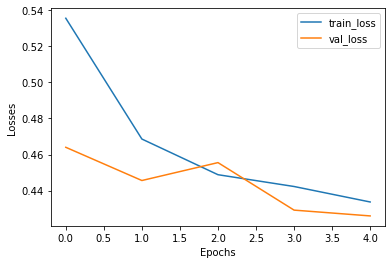

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.savefig('LossVal_loss.png')
plt.show()

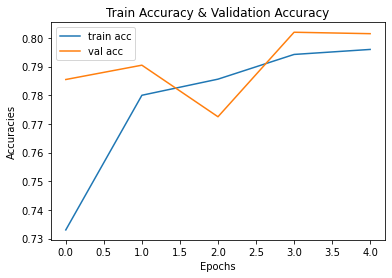

In [19]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Train Accuracy & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.savefig('AccVal_acc.png')
plt.show()

In [21]:
model.save('catordog_model.h5')